In [283]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss,roc_auc_score,accuracy_score,confusion_matrix
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier

In [284]:
train1 = pd.read_csv('features.csv')

In [285]:
le=preprocessing.LabelEncoder()
le.fit(train1['school'])

LabelEncoder()

In [286]:
le.classes_

array(['GP', 'MS'], dtype=object)

In [287]:
train1['school']=le.transform(train1['school'])

In [288]:
train1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,0,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,0,11,11,Portuguese,Satisfactory,Always Regular,Failure,Satisfactory
1,0,F,17,U,GT3,T,1,1,at_home,other,...,3,2,9,11,11,Portuguese,Satisfactory,Always Regular,Poor,Satisfactory
2,0,F,15,U,LE3,T,1,1,at_home,other,...,3,6,12,13,12,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory
3,0,F,15,U,GT3,T,4,2,health,services,...,5,0,14,14,14,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory
4,0,F,16,U,GT3,T,3,3,other,other,...,5,0,11,13,13,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory


In [289]:
train1.columns



Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject', 'FinalGrade',
       'Regularity', 'Grade1', 'Grade2'],
      dtype='object')

In [290]:
le.fit(train1['sex'])
train1['sex']=le.transform(train1['sex'])

In [291]:
le.fit(train1['subject'])
train1['subject']=le.transform(train1['subject'])

In [292]:
le.fit(train1['address'])
train1['address']=le.transform(train1['address'])

In [293]:
le.fit(train1['famsize'])
train1['famsize']=le.transform(train1['famsize'])

In [294]:
le.fit(train1['Pstatus'])
train1['Pstatus']=le.transform(train1['Pstatus'])

In [295]:
le.fit(train1['Mjob'])
train1['Mjob']=le.transform(train1['Mjob'])

In [296]:
le.fit(train1['Fjob'])
train1['Fjob']=le.transform(train1['Fjob'])

In [297]:
le.fit(train1['reason'])
train1['reason']=le.transform(train1['reason'])

In [298]:
le.fit(train1['guardian'])
train1['guardian']=le.transform(train1['guardian'])

In [299]:
le.fit(train1['schoolsup'])
train1['schoolsup']=le.transform(train1['schoolsup'])

In [300]:
le.fit(train1['famsup'])
train1['famsup']=le.transform(train1['famsup'])

In [301]:
le.fit(train1['paid'])
train1['paid']=le.transform(train1['paid'])

In [302]:
le.fit(train1['activities'])
train1['activities']=le.transform(train1['activities'])

In [303]:
le.fit(train1['nursery'])
train1['nursery']=le.transform(train1['nursery'])

In [304]:
le.fit(train1['higher'])
train1['higher']=le.transform(train1['higher'])

In [305]:
le.fit(train1['internet'])
train1['internet']=le.transform(train1['internet'])

In [306]:
le.fit(train1['romantic'])
train1['romantic']=le.transform(train1['romantic'])

In [307]:
# train1 = pd.get_dummies(train1)


In [308]:
train1.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,0,0,18,1,0,0,4,4,0,4,...,3,4,0,11,11,1,Satisfactory,Always Regular,Failure,Satisfactory
1,0,0,17,1,0,1,1,1,0,2,...,3,2,9,11,11,1,Satisfactory,Always Regular,Poor,Satisfactory
2,0,0,15,1,1,1,1,1,0,2,...,3,6,12,13,12,1,Satisfactory,Always Regular,Satisfactory,Satisfactory
3,0,0,15,1,0,1,4,2,1,3,...,5,0,14,14,14,1,Satisfactory,Always Regular,Satisfactory,Satisfactory
4,0,0,16,1,0,1,3,3,2,2,...,5,0,11,13,13,1,Satisfactory,Always Regular,Satisfactory,Satisfactory
5,0,1,16,1,1,1,4,3,3,2,...,5,6,12,12,13,1,Satisfactory,Always Regular,Satisfactory,Satisfactory
6,0,1,16,1,1,1,2,2,2,2,...,3,0,13,12,13,1,Satisfactory,Always Regular,Satisfactory,Satisfactory
7,0,0,17,1,0,0,4,4,2,4,...,1,2,10,13,13,1,Satisfactory,Always Regular,Poor,Satisfactory
8,0,1,15,1,1,0,3,2,3,2,...,1,0,15,16,17,1,Good,Always Regular,Good,Good
9,0,1,15,1,0,1,3,4,2,2,...,5,0,12,12,13,1,Satisfactory,Always Regular,Satisfactory,Satisfactory


In [309]:
train1['FinalGrade'] = 'na'
train1.loc[(train1.G3 >= 18) & (train1.G3 <= 20), 'FinalGrade'] = 'Excellent'
train1.loc[(train1.G3 >= 15) & (train1.G3 <= 17), 'FinalGrade'] = 'Good' 
train1.loc[(train1.G3 >= 11) & (train1.G3 <= 14), 'FinalGrade'] = 'Satisfactory' 
train1.loc[(train1.G3 >= 6) & (train1.G3 <= 10), 'FinalGrade'] = 'Poor' 
train1.loc[(train1.G3 >= 0) & (train1.G3 <= 5), 'FinalGrade'] = 'Failure' 
train1.head(5)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,0,0,18,1,0,0,4,4,0,4,...,3,4,0,11,11,1,Satisfactory,Always Regular,Failure,Satisfactory
1,0,0,17,1,0,1,1,1,0,2,...,3,2,9,11,11,1,Satisfactory,Always Regular,Poor,Satisfactory
2,0,0,15,1,1,1,1,1,0,2,...,3,6,12,13,12,1,Satisfactory,Always Regular,Satisfactory,Satisfactory
3,0,0,15,1,0,1,4,2,1,3,...,5,0,14,14,14,1,Satisfactory,Always Regular,Satisfactory,Satisfactory
4,0,0,16,1,0,1,3,3,2,2,...,5,0,11,13,13,1,Satisfactory,Always Regular,Satisfactory,Satisfactory


In [310]:
le.fit(train1['FinalGrade'])
train1['FinalGrade']=le.transform(train1['FinalGrade'])
le.fit(train1['Regularity'])
train1['Regularity']=le.transform(train1['Regularity'])
le.fit(train1['Grade1'])
train1['Grade1']=le.transform(train1['Grade1'])
le.fit(train1['Grade2'])
train1['Grade2']=le.transform(train1['Grade2'])
train1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,0,0,18,1,0,0,4,4,0,4,...,3,4,0,11,11,1,4,0,1,4
1,0,0,17,1,0,1,1,1,0,2,...,3,2,9,11,11,1,4,0,3,4
2,0,0,15,1,1,1,1,1,0,2,...,3,6,12,13,12,1,4,0,4,4
3,0,0,15,1,0,1,4,2,1,3,...,5,0,14,14,14,1,4,0,4,4
4,0,0,16,1,0,1,3,3,2,2,...,5,0,11,13,13,1,4,0,4,4


In [311]:
y=train1.FinalGrade
train1 = train1.drop(labels=['G3','FinalGrade'],axis=1)
train1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,subject,Regularity,Grade1,Grade2
0,0,0,18,1,0,0,4,4,0,4,...,1,1,3,4,0,11,1,0,1,4
1,0,0,17,1,0,1,1,1,0,2,...,1,1,3,2,9,11,1,0,3,4
2,0,0,15,1,1,1,1,1,0,2,...,2,3,3,6,12,13,1,0,4,4
3,0,0,15,1,0,1,4,2,1,3,...,1,1,5,0,14,14,1,0,4,4
4,0,0,16,1,0,1,3,3,2,2,...,1,2,5,0,11,13,1,0,4,4


In [312]:
                                ###  SPLIT DATA ###

In [313]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(train1,y,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(730, 36)
(730,)
(314, 36)
(314,)


In [314]:
                        ###  LOGISTIC REGRESSION  ###

In [315]:
lr =  LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_val)
y_predict = lr.predict_proba(x_val)



/home/srujan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/srujan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [316]:
print(y_val.shape)
print(y_predict.shape)
print("Log_Loss: ",log_loss(y_val,y_predict))
print("Accuracy_Score: ",accuracy_score(y_val,y_pred))

(314,)
(314, 5)
Log_Loss:  0.5402681176579688
Accuracy_Score:  0.8471337579617835


In [317]:
                        ###   CONFUSION MATRIX   ###

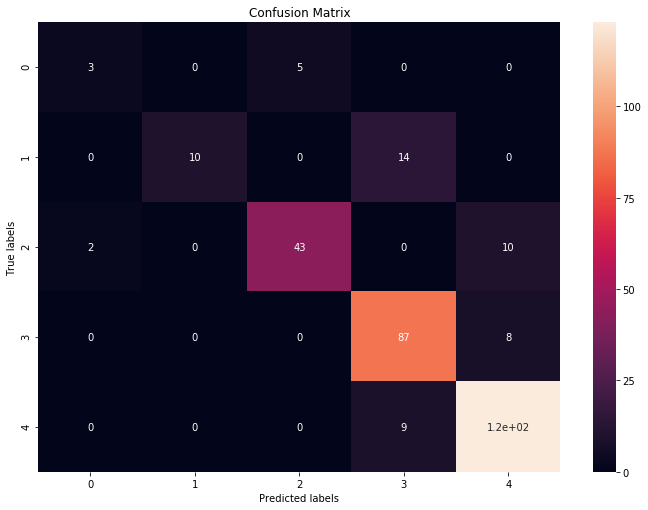

In [318]:
labels = list(range(0,21))
cm=confusion_matrix(y_val,y_pred)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [319]:
                        ###   RANDOM FOREST   ###

In [320]:
random_forest = RandomForestClassifier(n_estimators=36,min_samples_leaf=2)

f = random_forest.fit(x_train, y_train)

print("Raondom Forest Model Score" , ":" , f.score(x_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(x_val, y_val))
Y_pred = random_forest.predict_proba(x_val)
Y_pred1 = random_forest.predict(x_val)

Raondom Forest Model Score : 0.9602739726027397 , Cross Validation Score : 0.8598726114649682


In [321]:
print(log_loss(y_val,Y_pred))

0.4427279764794684


In [322]:
                    ### CONFUSION MATRIX ###

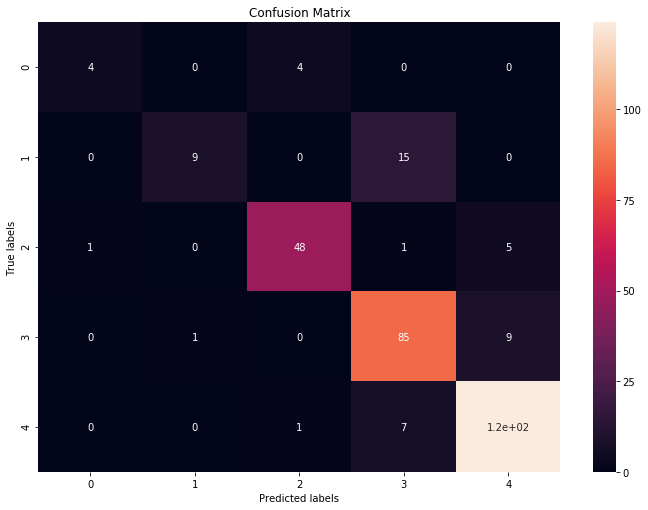

In [323]:
labels = list(range(0,21))
cm=confusion_matrix(y_val,Y_pred1)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);